# Price Is Your Right Challenge, Data: NH Cost Estimates
### Objective: To explore the shape and features of NH Data in order to develop a tool to aid in acessing information on medical prices by procedure or payer.

In [1]:
import pandas as pd

In [73]:
# load accompanying visualization tool
%matplotlib inline 

### Load Data
#### Read data from NH Cost Estimates spreadsheet, specofically the 'Cost Data' sheet.

In [7]:
nh_data = pd.read_excel("NHID_cost-estimates.xlsx",sheet_name="Cost Data")

In [8]:
nh_data.head()

,PROCEDURE_CODE,PROCEDURE_NAME,SHORT_DESCRIPTION,CATEGORY_NAME,COVERAGE_CLASS,MED_ALLOW,PRICE_PERCISION,PATIENT_COMPLEXITY,PAYER,PLAN_TYPE,...,ZIP10,ADDRESS11,CITY11,STATE11,ZIP11,ADDRESS12,CITY12,STATE12,ZIP13,WEBSITE
0,11100,"Biopsy, Skin lesion","Biopsy, Skin lesion",Outpatient Tests and Procedures,MED,680,MEDIUM,MEDIUM,Anthem - NH,Group (employer) Medical Plans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://http://littletonhealthcare.org/medical_...
1,11100,"Biopsy, Skin lesion","Biopsy, Skin lesion",Outpatient Tests and Procedures,MED,661,MEDIUM,MEDIUM,Anthem - NH,Individual (self-purchased) Medical Plans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://http://littletonhealthcare.org/medical_...
2,11100,"Biopsy, Skin lesion","Biopsy, Skin lesion",Outpatient Tests and Procedures,MED,612,MEDIUM,MEDIUM,Cigna,Group (employer) Medical Plans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://http://littletonhealthcare.org/medical_...
3,11100,"Biopsy, Skin lesion","Biopsy, Skin lesion",Outpatient Tests and Procedures,MED,555,VERY LOW,MEDIUM,Harvard Pilgrim HC,Group (employer) Medical Plans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://http://littletonhealthcare.org/medical_...
4,11100,"Biopsy, Skin lesion","Biopsy, Skin lesion",Outpatient Tests and Procedures,MED,814,HIGH,MEDIUM,Anthem - NH,Group (employer) Medical Plans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://patients.dartmouth-hitchcock.org/our_lo...


##  Explore the column features

In [76]:
nh_data.dtypes

PROCEDURE_CODE         object
PROCEDURE_NAME         object
SHORT_DESCRIPTION      object
CATEGORY_NAME          object
COVERAGE_CLASS         object
MED_ALLOW               int64
PRICE_PERCISION        object
PATIENT_COMPLEXITY     object
PAYER                  object
PLAN_TYPE              object
PROVIDER_NAME          object
ADDRESS1               object
CITY1                  object
STATE1                 object
ZIP1                    int64
ADDRESS2               object
CITY2                  object
STATE2                 object
ZIP2                  float64
ADDRESS3               object
CITY3                  object
STATE3                 object
ZIP3                  float64
ADDRESS4               object
CITY4                  object
STATE4                 object
ZIP4                  float64
ADDRESS5               object
CITY5                  object
STATE5                 object
ZIP5                  float64
ADDRESS6               object
CITY6                  object
STATE6    

### How many numeric variables?
#### There appears to be a lot of unstructured and semi-structured text data. 
-- Should we do a deep dive into an individaul procedure code or group of codes?

In [78]:
nh_data.dtypes.value_counts()

object     47
float64    11
int64       2
dtype: int64

#### Results:
- 11 float64 
- 2 int64

 * `MED_ALLOW` is the first `int64` column identified and is the datasets estimated price measure. The remaining of the numeric columns are zipcodes, which can be used for geospatial analysis.

# Exploring the relationship between Payers and Providers
This dataset has a lot of information about the financial relationship between Medical Insurance Plans and Providers. I want to broadly explore that relationship to better understand potential variation in this dataset.

###  Number of unique providers by Payer and Plan Type (Individual, Group, Dental)

In [18]:
nh_agg_payer_uni_prov = nh_data.groupby(['PAYER','PLAN_TYPE']).agg({'PROVIDER_NAME':pd.Series.nunique}).reset_index()

nh_agg_payer_uni_prov

,PAYER,PLAN_TYPE,PROVIDER_NAME
0,Aetna,All Dental Plans,462
1,Anthem - NH,Group (employer) Medical Plans,1567
2,Anthem - NH,Individual (self-purchased) Medical Plans,1199
3,Cigna,All Dental Plans,602
4,Cigna,Group (employer) Medical Plans,918
5,Cigna,Individual (self-purchased) Medical Plans,3
6,Delta Dental - NH,All Dental Plans,687
7,Harvard Pilgrim HC,Group (employer) Medical Plans,1461
8,Harvard Pilgrim HC,Individual (self-purchased) Medical Plans,982
9,Metropolitan Life,All Dental Plans,596


######  Outlier: two payers have suprisingly low numbers of providers for one plan tyoe
* Cigna-Individual (self-purchased) Medical Plans - **3 unique providers**
* Other Medical Insurance-Individual (self-purchased) Medical Plans	- **8 unique providers**

###  Number of unique providers by Payer, Individually Purchased Medical Plans

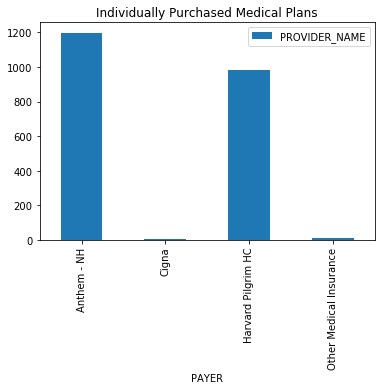

In [33]:
nh_agg_payer_uni_prov[nh_agg_payer_uni_prov.PLAN_TYPE=='Individual (self-purchased) Medical Plans'].plot(
    title= "Individually Purchased Medical Plans",x='PAYER',y='PROVIDER_NAME',kind='bar',)

###  Number of unique providers by Payer, Group Purchased Medical Plans

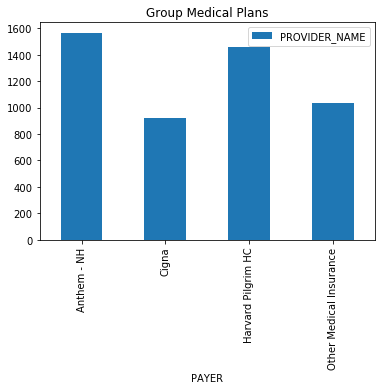

In [24]:
nh_agg_payer_uni_prov[nh_agg_payer_uni_prov.PLAN_TYPE=='Group (employer) Medical Plans'].plot(
    title= "Group Medical Plans",x='PAYER',y='PROVIDER_NAME',kind='bar',)

### Whats happening with the number of unique providers from Cigna and Other Medical Insurance payers between individual plans and group plans?


- We explore the records associated with Cigna for its 'Individual (self-purchased) Medical Plans', we discovver there are only 7 records, from 3 unique providers. The records do not have information on patient_complexity. I am concerned about how to assess Cigna's individual plan potential costs without addressing a large amount of uncertainty. 

In [46]:
nh_data[(nh_data.PAYER=='Cigna')&(nh_data.PLAN_TYPE=='Individual (self-purchased) Medical Plans')].iloc[:,0:20]

,PROCEDURE_CODE,PROCEDURE_NAME,SHORT_DESCRIPTION,CATEGORY_NAME,COVERAGE_CLASS,MED_ALLOW,PRICE_PERCISION,PATIENT_COMPLEXITY,PAYER,PLAN_TYPE,PROVIDER_NAME,ADDRESS1,CITY1,STATE1,ZIP1,ADDRESS2,CITY2,STATE2,ZIP2,ADDRESS3
12130,88175,Pap Test,Pap test - swab test,Laboratory Services,MED,195,LOW,NaN,Cigna,Individual (self-purchased) Medical Plans,ALICE PECK DAY MEMORIAL HOSPITAL,10 ALICE PECK DAY DRIVE,LEBANON,NH,3766,NaN,NaN,NaN,NaN,NaN
20659,97110,Therapeutic Exercises - PT,Therapeutic Exercises - PT,Physical Therapy,MED,32,HIGH,NaN,Cigna,Individual (self-purchased) Medical Plans,GREEN MOUNTAIN PHYSICAL THERAPY,103 S MAIN STREET,WEST LEBANON,NH,3784,NaN,NaN,NaN,NaN,NaN
20703,97110,Therapeutic Exercises - PT,Therapeutic Exercises - PT,Physical Therapy,MED,30,HIGH,NaN,Cigna,Individual (self-purchased) Medical Plans,BE FIT PHYSICAL THERAPY,45 LYME ROAD,HANOVER,NH,3755,NaN,NaN,NaN,NaN,NaN
22079,97140,Manual Therapy - PT,Manual Therapy - PT,Physical Therapy,MED,30,HIGH,NaN,Cigna,Individual (self-purchased) Medical Plans,GREEN MOUNTAIN PHYSICAL THERAPY,103 S MAIN STREET,WEST LEBANON,NH,3784,NaN,NaN,NaN,NaN,NaN
22114,97140,Manual Therapy - PT,Manual Therapy - PT,Physical Therapy,MED,22,HIGH,NaN,Cigna,Individual (self-purchased) Medical Plans,BE FIT PHYSICAL THERAPY,45 LYME ROAD,HANOVER,NH,3755,NaN,NaN,NaN,NaN,NaN
22758,97161,Low Complexity Evaluation - PT,Low Complexity Evaluation - PT,Physical Therapy,MED,76,HIGH,NaN,Cigna,Individual (self-purchased) Medical Plans,BE FIT PHYSICAL THERAPY,45 LYME ROAD,HANOVER,NH,3755,NaN,NaN,NaN,NaN,NaN
36349,99396,Comp Preventive Medicine 40-64 yrs old,Periodic comprehensive preventive medicine eva...,Office Visits,MED,130,LOW,NaN,Cigna,Individual (self-purchased) Medical Plans,ALICE PECK DAY MEMORIAL HOSPITAL,10 ALICE PECK DAY DRIVE,LEBANON,NH,3766,NaN,NaN,NaN,NaN,NaN


#### I think it would be worth mapping this, there may be a cluster around an individual's usage
This data seems to be clustered two cities in New Hampshire, I wonder if there is any potential that it is one patient getting medical services? 

In [29]:
nh_unique_provider = nh_data['PROVIDER_NAME'].unique()

In [32]:
len(nh_unique_provider)

2376

## Quick Takeaways
- There are a lot of doctors that are shared by different payers, 2,236 unique providers
- Data seems a bit funky for Cigna; why is there such little data for the individual, self-pruchased medical plan versus the  group medical plan?

# Price data analysis
Broadly want to explore what the variation in price data exists by structuring the data in different ways.

In [49]:
nh_data['MED_ALLOW'].describe()

count    67809.000000
mean       196.199737
std        533.111487
min          1.000000
25%         55.000000
50%        106.000000
75%        198.000000
max      25201.000000
Name: MED_ALLOW, dtype: float64

In [154]:
nh_agg_catname = nh_data.groupby('CATEGORY_NAME')['MED_ALLOW'].describe(include='all')
nh_agg_catname

,count,mean,std,min,25%,50%,75%,max
CATEGORY_NAME,,,,,,,,
Ambulance Services,1625.0,503.526154,476.448890,2.0,16.00,497.0,714.00,2250.0
Behavioral Health Care,7233.0,90.546246,27.319634,18.0,70.00,88.0,105.00,294.0
Chiropractic Care,1377.0,44.292665,8.233910,8.0,38.00,41.0,49.00,74.0
Dental Fillings,8418.0,260.696603,105.131377,1.0,188.00,236.0,321.00,708.0
Diagnostic Services,12265.0,87.396005,55.950680,6.0,48.00,74.0,113.00,340.0
Emergency Visits,511.0,328.819961,240.947352,45.0,174.50,269.0,427.00,1868.0
Laboratory Services,7410.0,39.736302,42.592300,1.0,13.00,24.0,52.00,490.0
Office Visits,11074.0,168.093823,65.754170,9.0,122.00,161.0,212.00,474.0
Orthodontic Services,122.0,84.336066,33.220180,30.0,55.25,69.0,107.00,158.0


In [152]:
? nh_data.groupby('CATEGORY_NAME')['MED_ALLOW'].describe()

###  Plot the Extremes and Centers of Tendency 

In [ ]:
# Setup plotly in offline mode 

In [54]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [149]:
def make_go_box(cat_pts,name):
    # make a quick box plot with jitter points to illustrate distrubtion
    box_plot = go.Box(y=cat_pts,
            boxpoints='all', # can also be outliers, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8, # relative position of points wrt box
            name  = name       )
    return (box_plot)

In [159]:
nh_group_CAT_NAMES = nh_data.groupby('CATEGORY_NAME')

nh_group_CAT_NAMES_groups = nh_group_CAT_NAMES.groups

In [161]:
nh_group_CAT_NAMES_groups.keys()

dict_keys(['Physical Therapy', 'Outpatient Tests and Procedures', 'Laboratory Services', 'Orthodontic Services', 'Office Visits', 'Other Dental Services', 'Radiology Services', 'Behavioral Health Care', 'Preventive Care', 'Diagnostic Services', 'Emergency Visits', 'Ambulance Services', 'Dental Fillings', 'Chiropractic Care'])

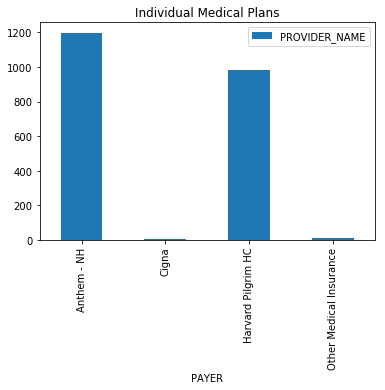

In [25]:
nh_agg_payer_uni_prov[nh_agg_payer_uni_prov.PLAN_TYPE=='Individual (self-purchased) Medical Plans'].plot(title= "Individual Medical Plans",x='PAYER',y='PROVIDER_NAME',kind='bar',)

In [170]:
nh_data[nh_data.CATEGORY_NAME=='Physical Therapy'].MED_ALLOW.values

array([ 4,  4,  7, ..., 30, 37, 37])

In [168]:
nh_group_CAT_NAMES_groups['Physical Therapy']

19481

In [171]:
cat_boxs = []
for name in nh_group_CAT_NAMES_groups:
    points = nh_data[nh_data.CATEGORY_NAME==name].MED_ALLOW.values
    cat_box = make_go_box(points,name)
    cat_boxs.append(cat_box)

In [172]:
iplot(cat_boxs)

In [ ]:
figure = [go.Box(y= cat_pts,name = cat_name) for cat_name, cat_pts in nh_data.groupby('CATEGORY_NAME')['MED_ALLOW'] ]

In [69]:
trace_cat_price_max = go.Bar(x=nh_agg_catname["max"].index,y= nh_agg_catname["max"].values,name='Max')
trace_cat_price_mean= go.Scatter(x=nh_agg_catname["mean"].index,y= nh_agg_catname["mean"].values, name='Average (mean)')
trace_cat_price_median = go.Scatter(x=nh_agg_catname["50%"].index,y= nh_agg_catname["50%"].values,name = 'Median')

data_max = [trace_cat_price_max,
       ]
data_centroid = [ trace_cat_price_mean,
        trace_cat_price_median]

In [72]:
iplot(data_max)

In [71]:
iplot(data_centroid)

## Quick take aways
- Price data looks like it varies a lot by procedure category type. 
- Price seems to be steady across the various centers of tendency. 
- Outpatient Tests and Procedures is the most expensive.

# Remaining Questions
### How do procedure prices varies by provider?
- By Payer?
### How do regional prices vary by provider?
- Exploring the geospatial element
### What are the indivdual estimated out-of-pocket price by procedure?
### What are the quality outcomes by procedure by provider?
### How can we use the categorical measures?
- COVERAGE_CLASS
- PRICE_PERCISION 
- PATIENT_COMPLEXITY